<a href="https://colab.research.google.com/github/FranciscoMessina00/HomeworkCMRM2023/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMRM Homework Assignment No. 1 (HW1)

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
# import other libraries
!pip install deeplake
!pip install "deeplake[av]"
import deeplake
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 574.5/574.5 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8

## Question 1

In [3]:
# Import dataset
ds = deeplake.load("hub://activeloop/gtzan-genre")

# 16 bit, 22050 Hz, with 352'800 bit/s
ds.summary()

-

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/gtzan-genre



|

hub://activeloop/gtzan-genre loaded successfully.

Dataset(path='hub://activeloop/gtzan-genre', read_only=True, tensors=['audio', 'genre'])

 tensor      htype              shape             dtype  compression
 -------    -------            -------           -------  ------- 
  audio      audio     (1000, 660000:675808, 1)   None      wav   
  genre   class_label         (1000, 1)          uint32    None   


In [ ]:
print(np.shape(ciao))

(3, 661504, 1)


In [64]:
Fs = 22050
n_samples = 29 * Fs # duration in samples

# Define downsampling factors
sub_train = 10
sub_test = 50

# Extract classes
genre_names = ['pop', 'metal', 'classical', 'rock', 'blues', 'jazz', 'hiphop', 'reggae', 'disco', 'country']

# Indexes
i_train = np.arange(0, len(ds),sub_train)
i_test = np.arange(0, len(ds),sub_test)

genre_train = ds.genre[0:len(ds):sub_train].numpy()
genre_test = ds.genre[10:len(ds):sub_test].numpy()
print(np.shape(genre_train))
print(np.shape(genre_test))

# Extract training set
#for i in tqdm(range(100)):
audio_train_list = ds.audio[0:len(ds):sub_train].numpy(aslist = True)
new_audio_train = np.array([])
for i in range(len(audio_train_list)):
  audio_train_list[i] = audio_train_list[i][:639450]
  new_audio_train = np.append(new_audio_train, audio_train_list[i])
# as we append the elements, the array will be 1 dimensional, we will reshape
# the array to be 2 dimensional, and we know that the number of elements of the
# train is the length of i_train
num_elements_train = len(i_train)
audio_train = new_audio_train[:num_elements_train * 639450].reshape(-1, 639450)

print(np.shape(audio_train))

# Extract test set
#for i in tqdm(range(100)):
audio_test_list = ds.audio[10:len(ds):sub_train].numpy(aslist = True)
new_audio_test = np.array([])
for i in range(len(audio_test_list)):
  audio_test_list[i] = audio_test_list[i][:639450]
  new_audio_test = np.append(new_audio_test, audio_test_list[i])
# as we append the elements, the array will be 1 dimensional, we will reshape
# the array to be 2 dimensional, and we know that the number of elements of the
# train is the length of i_test
num_elements_test = len(i_test)
audio_test = new_audio_test[:num_elements_test * 639450].reshape(-1, 639450)

print(np.shape(audio_test))

(100, 1)
(20, 1)
(100, 639450)
(20, 639450)


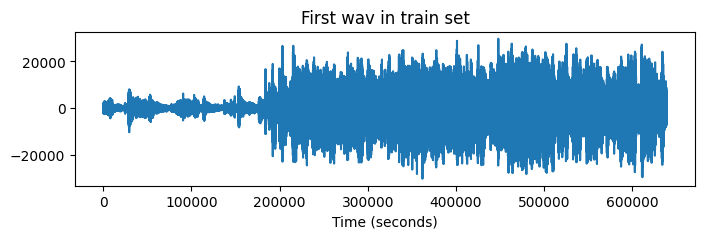

In [65]:
# Plot the first wav in the train set
plt.figure(figsize=(8, 2))
plt.title('First wav in train set')
plt.xlabel('Time (seconds)')
plt.plot(audio_train[0])
plt.show()

## Question 2

In [ ]:
# Preprocessing


In [ ]:
# Plot the first wav in the train set after preprocessing


In [ ]:
# Compute local average
def compute_local_average(x, M):
    """Compute local average of signal

    Args:
        x: Signal
        M: Total length in samples of centric window  used for local average

    Returns:
        local_average: Local average signal
    """

    ...

    return local_average

# Compute the principal argument
def principal_argument(x):
    """Principal argument function

    Args:
        x: value (or vector of values)

    Returns:
        y: Principal value of x
    """

    ...

    return y

# Compute the Phase-Based Novelty function
def compute_phase_novelty(x, Fs=1, N=1024, H=64, M=40, norm=True, plot=False):
    """Compute phase-based novelty function

    Args:
        x: Signal
        Fs: Sampling rate
        N: Window size
        H: Hop size
        M: Total length in samples of centric window  used for local average
        norm: Apply max norm (if norm==True)
        plot: plot novelty (if plot==True)

    Returns:
        nov: Phase-based novelty function
        Fs_nov: Novelty rate
    """

    # Compute the STFT


    # Compute the novelty rate


    # Extract the phase and use principal_argument


    # Accumulation over frequency axis


    # Local average subtraction and half-wave rectification
    if M > 0:


    # Normalization
    if norm:


    # Plot
    if plot:


    return nov, Fs_nov

In [ ]:
# Test the novelty function on the first wav in the train set



## Question 3

In [ ]:
def compute_feature_vector(x, Fs, N=2048, H=128):
    """Compute the feature vector

    Args:
        x: Input signal
        Fs: Sampling rate
        N: Window length
        H: Hop size

    Returns:
        f_vector: Feature vector
    """

    # Compute rhythmic features


    # Concatenate numpy arrays



    return f_vector

In [ ]:
# Compute feature vector for all the audio files inside the training set
N = 2048
H = 128

train_fvector = []

...

test_fvector = []

...

In [ ]:
# Check train_fvector and genre_train shapes



## Question 4

In [ ]:
# Define model parameters


if not os.path.exists('my_model/'):
    os.mkdir('my_model/')

# Train SVC



In [ ]:
# Print the accuracy on the training set



## Question 5

In [ ]:
# Classify the test set



In [ ]:
# Print the accuracy


# Plot the confusion matrix

